<a href="https://colab.research.google.com/github/ienoiaa/ienoia/blob/master/Calvario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Preliminary EDA

In [7]:
df = pd.read_csv("/content/clean_books.csv")

print("\nc. First 5 rows:")
display(df.head())

print("\nd. Data Info:")
df.info()

print("\ne. Value counts (Categorical columns):")
print(df.value_counts)

print("\nf. Statistical Summary:")
display(df.describe())


c. First 5 rows:


,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016.0,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011.0,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018.0,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017.0,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019.0,Childrens



d. Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  346 non-null    float64
 3   year    349 non-null    float64
 4   genre   350 non-null    object 
dtypes: float64(2), object(3)
memory usage: 13.8+ KB

e. Value counts (Categorical columns):
<bound method DataFrame.value_counts of                                                   name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
345  Wild: From Lost to Found on the Pacific Crest ...   
346  Winter of the World:

,rating,year
count,346.000000,349.000000
mean,4.609249,2013.522923
std,0.227465,3.282143
min,3.300000,2009.000000
25%,4.500000,2010.000000
50%,4.600000,2013.000000
75%,4.800000,2016.000000
max,4.900000,2019.000000


In [8]:
print("\n2. Grouped by Genre:")
print(df[["genre", "rating", "year"]].groupby("genre").mean())

print("\n3. Custom Aggregations:")
print(df[["rating", "year"]].agg(["mean", "std"]))

print("\n4. Aggregation for columns:")
print(df.agg({"rating": ["mean", "std", "max"], "year": ["median"]}))

print("\n5. Average Rating per Genre")
print(df.groupby("genre").agg(
    mean_rating=("rating", "mean")))


2. Grouped by Genre:
               rating         year
genre                             
Childrens    4.782051  2015.075000
Fiction      4.572308  2013.026718
Non Fiction  4.598305  2013.539326

3. Custom Aggregations:
        rating         year
mean  4.609249  2013.522923
std   0.227465     3.282143

4. Aggregation for columns:
          rating    year
mean    4.609249     NaN
std     0.227465     NaN
max     4.900000     NaN
median       NaN  2013.0

5. Average Rating per Genre
             mean_rating
genre                   
Childrens       4.782051
Fiction         4.572308
Non Fiction     4.598305



6. Top 5 Published Authors:


,count
author,
Jeff Kinney,12
Rick Riordan,10
Stephenie Meyer,7
Bill O'Reilly,6
J.K. Rowling,6


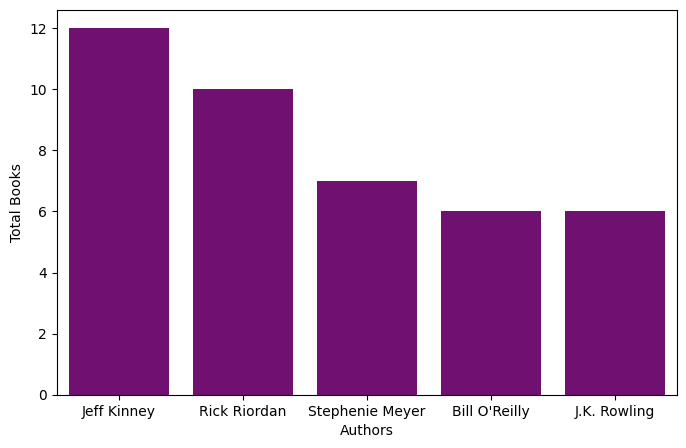

In [9]:
print("\n6. Top 5 Published Authors:")
top_authors = df["author"].value_counts().head()
display(top_authors)
plt.figure(figsize=(8,5))
sns.barplot(x=top_authors.index, y=top_authors.values, color="purple")
plt.xlabel("Authors")
plt.ylabel("Total Books")
plt.show()

Answer: The figure shows the top 5 published authors by the number of books they have. Jeff Kinney is the most-published with 12 books, followed by Rick Riordan with 10. Stephenie Meyer has 7 books, and Bill O'Reilly and J.K. Rowling are tied with 6 books each.


7. Count of genre published per year


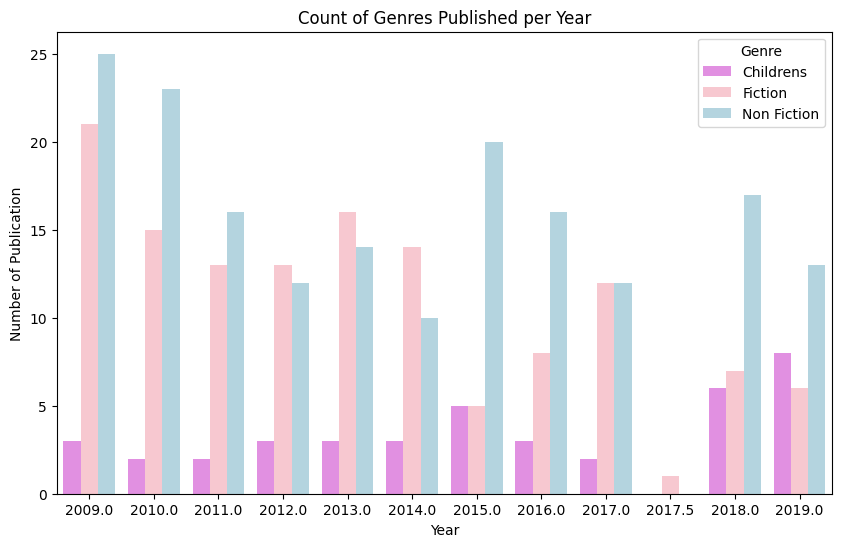

In [10]:
print("\n7. Count of genre published per year")
colors= {"Childrens": "violet",
        "Fiction": "pink",
         "Non Fiction": "lightblue"}
genre_year = df.groupby(["year", "genre"]).size().reset_index(name="count")
plt.figure(figsize=(10,6))
sns.barplot(data=genre_year, x="year", y="count", hue="genre", palette=colors)
plt.xlabel("Year")
plt.ylabel("Number of Publication")
plt.title("Count of Genres Published per Year")
plt.legend(title="Genre")
plt.show()

Answer: The figure illustrates the number of books published per year for three genres: Non-Fiction, Fiction, and Children's. Non-Fiction is the most consistently published genre, dominating most years. Fiction publication numbers vary, with a notable peak in 2013 and a sharp decline in 2017.5. Children's publications are the lowest in number but have seen a recent increase in 2018 and 2019.